# MNIST Handwritten Digit Clasification using Deep Learning

Importing the required libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore") 

 Loading the MNIST data from keras.datasets

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


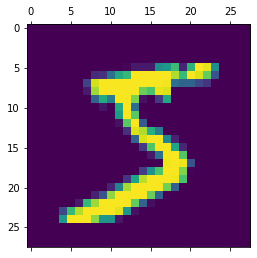

In [8]:
# displaying the image
plt.matshow(X_train[0])
# print the corresponding label
print(y_train[0])

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [11]:
# unique values in Y_train
print(np.unique(y_train))

# unique values in Y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we need to resize all the images to a common dimension

In [12]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

# CNN Model

In [13]:
cnn = keras.Sequential([
    Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

compiling and training the model

In [15]:
#compiling and training the model 
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.2299 - accuracy: 0.9290
Epoch 2/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0737 - accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0530 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0424 - accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0343 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0284 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 8/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0194 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.0169 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 98s 5

Training data accuracy = 99.5%

In [16]:
#Accuracy on Test data:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.0561 - accuracy: 0.9873


[0.05614606291055679, 0.9872999787330627]

Test data accuracy=98.8%

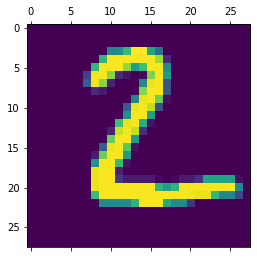

In [17]:
# Second data point in X_test
plt.matshow(X_test[1])

In [18]:
print(y_test[1])

2


In [19]:
y_predicted = cnn.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [20]:
y_predicted[1]

array([2.4900078e-07, 1.9686858e-11, 9.9999976e-01, 5.2539608e-09,
       1.4422911e-09, 1.8196001e-16, 2.1470888e-10, 3.5622106e-12,
       1.3907848e-11, 5.8970155e-11], dtype=float32)

# model.predict() gives the prediction probability of each class for that data point

In [21]:
np.argmax(y_predicted[1])

2

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [23]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Y_test --> True labels

Y_predicted_labels --> Predicted Labels

Confusin Matrix

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    1,    1,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1132,    0,    2,    0,    0,    0,    0,    1,    0],
       [   4,    1, 1017,    1,    0,    0,    1,    8,    0,    0],
       [   0,    0,    1,  998,    0,    9,    0,    1,    0,    1],
       [   0,    0,    0,    0,  978,    0,    2,    0,    0,    2],
       [   2,    0,    0,    3,    0,  883,    2,    1,    0,    1],
       [   5,    2,    0,    0,    3,    2,  946,    0,    0,    0],
       [   1,    4,   13,    2,    1,    1,    0, 1005,    0,    1],
       [   6,    0,    2,    2,    3,    1,    4,    0,  953,    3],
       [   3,    0,    0,    0,   10,    4,    1,    4,    2,  985]])>

Text(69.0, 0.5, 'Truth')

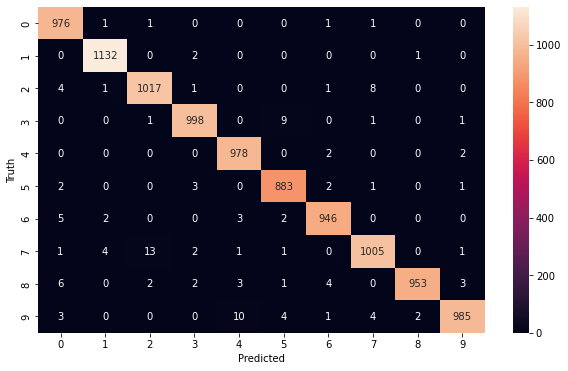

In [25]:
import seaborn as sn
plt.figure(figsize = (10,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Builing a predictive model

In [26]:
input_image_path = 'C:/Users/Sony/Downloads/img3.png'

input_image = cv2.imread(input_image_path)

In [27]:
type(input_image)

numpy.ndarray

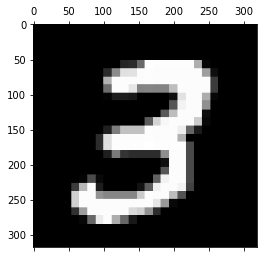

In [28]:
plt.matshow(input_image)

In [29]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [30]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [31]:
input_image_resize = input_image_resize/255

In [32]:
image_reshaped = np.reshape(input_image_resize, [1,28,28,1])

In [33]:
input_prediction = cnn.predict(image_reshaped)

1/1 [==============================] - 0s 153ms/step


In [34]:
input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

The Handwritten Digit is recognised as  3


## Making the Predictive System

Path of the image to be predicted: C:/Users/Sony/Downloads/img3.png
1/1 [==============================] - 0s 29ms/step
The Handwritten Digit is recognised as  3


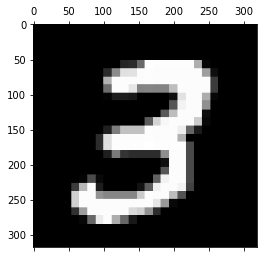

In [35]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.matshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28,1])

input_prediction = cnn.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

In [ ]:
#Dumping the cnn model to a file
cnn.save("model_trained.p")